# Implementation of the CVM algorithm to estimate the number of distinct elements in a data stream
## Implementation in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import random

In [2]:
DECISION_ADD = 'add'
DECISION_PASS = 'pass'
DECISIONS = [DECISION_ADD, DECISION_PASS]

def random_add_or_pass(p=1.0):
    """
    Randomly decides whether to perform an addition operation or pass.

    This function uses a probability `p` to determine if an addition operation
    should be performed or if the function should simply pass (do nothing).

    Parameters:
    p (float): The probability of performing the addition operation.
               This value should be between 0.0 and 1.0, inclusive.
               Default is 1.0, meaning the addition operation will always be performed.

    Returns:
    str: Either 'pass' stored in the constant DECISION_PASS or 'add' stored in the constant DECISION_ADD.

    Example:
    >>> random_add_or_pass(0.5)
    # This call has a 50% chance of returning 'add' and a 50% chance of returning 'pass'.
    """
    choice = np.random.choice(DECISIONS, p=[p, 1.0-p])
    return choice


def count_elements(stream, max_capacity=10):
    """
    Implements the CVM algorithm to estimate the number of distinct elements in a data stream.

    This function uses the CVM algorithm, named after the researchers Sourav Chakraborty, 
    N. V. Vinodchandran, and Kuldeep S. Meel, to approximate the count of distinct elements in a data stream 
    with a fixed memory capacity. The algorithm is particularly useful for scenarios where memory is limited 
    and the exact count is not necessary, but an approximate count within a certain error bound is sufficient.

    Parameters:
    stream (iterable): An iterable (e.g., list, generator) containing the elements to be counted.
    max_capacity (int): The maximum capacity of the CVM data structure.
                        This determines the trade-off between memory usage and accuracy.
                        Default is 10.

    Returns:
    tuple: A tuple containing:
           - int or None: The final estimated count of distinct elements in the stream. In some very unlikely scenarios, this may be None.
           - list of int: A list representing the history of the estimated count of distinct elements after each element in the stream is processed.


    Example:
    >>> stream = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
    >>> count_elements(stream, max_capacity=5)
    # This call will return a tuple with the final estimated count of distinct elements (or None in rare cases) and the history of estimated counts.
    """
    unique_elts = set()
    p = 1.0

    history = []

    for e in stream:
        # First remove e from the set of unique elements
        if e in unique_elts:
            unique_elts.remove(e)

        # Decision to add or pass based on p
        decision = random_add_or_pass(p)
        if decision == DECISION_ADD:
            unique_elts.add(e)

        if len(unique_elts) >= max_capacity:
            # Divide the probability by 2.0
            p = p / 2.0
            
            # Remove every element of unique_elts with a probability of 1/2
            new_unique_elts = set()
            for uniq_e in unique_elts: 
                decision = random_add_or_pass(p=1.0/2.0)
                if decision == DECISION_ADD:
                    new_unique_elts.add(uniq_e)
            unique_elts = new_unique_elts

            if len(unique_elts) >= max_capacity:
                # Error case
                return None, history

        current_result = int(len(unique_elts) / p)
        history.append(current_result)

    result = int(len(unique_elts) / p)
    return result, history



## Experimental results
### Single test: the alphabet

In [3]:
# Let's try on the alphabet
unique_elements = list('abcdefghijklmnopqrstuvwxyz')

# Let's make a stream of 10000
stream = np.random.choice(unique_elements, 10000)
print(f"Number of unique elements: {len(set(unique_elements))}")

Number of unique elements: 26


In [4]:
estimated_count, history = count_elements(stream, max_capacity=15)
estimated_count

8

In [5]:
# Estimation of the number of unique elements of the stream with the average of 10 runs and a memory of 15
np.mean([count_elements(stream, max_capacity=15)[0] for _ in range(10)])

np.float64(22.0)

### Plotting 10 trajectories for a stream of 100 unique elements and a capacity of 30

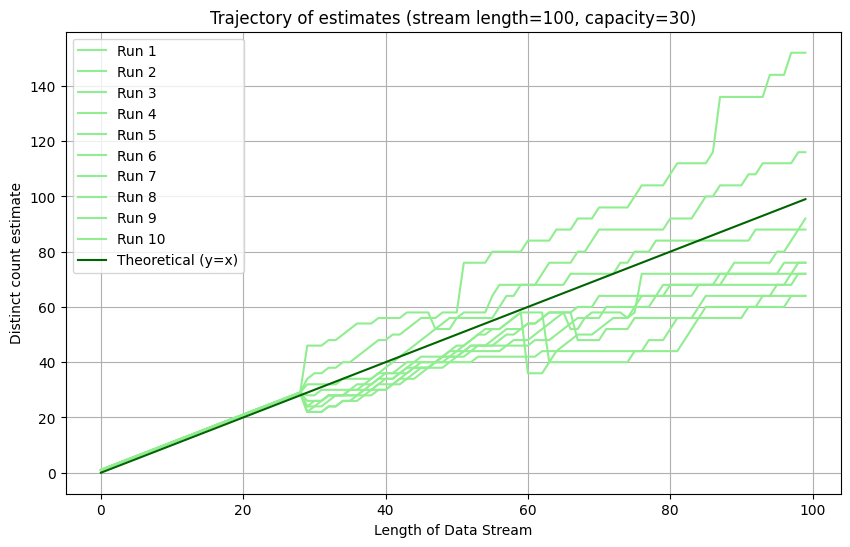

In [6]:
# Run the count_elements function 10 times with a stream of 100 unique elements
stream_len = 100
stream = list(range(stream_len))
max_capacity = 30
runs = 10
histories = []

for _ in range(runs):
    _, history = count_elements(stream, max_capacity)
    histories.append(history)

# Plot the history of these runs
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history, label=f'Run {i+1}', color='lightgreen')

# Plot the theoretical curve y=x
plt.plot(range(stream_len), range(stream_len), label='Theoretical (y=x)', linestyle='-', color='darkgreen')

# Add labels and legend
plt.xlabel('Length of Data Stream')
plt.ylabel('Distinct count estimate')
plt.title(f'Trajectory of estimates (stream length={stream_len}, capacity={max_capacity})')
plt.legend()
plt.grid(True)
plt.show()

### Plotting 10 trajectories for a stream of 100 unique elements and a capacity of 15

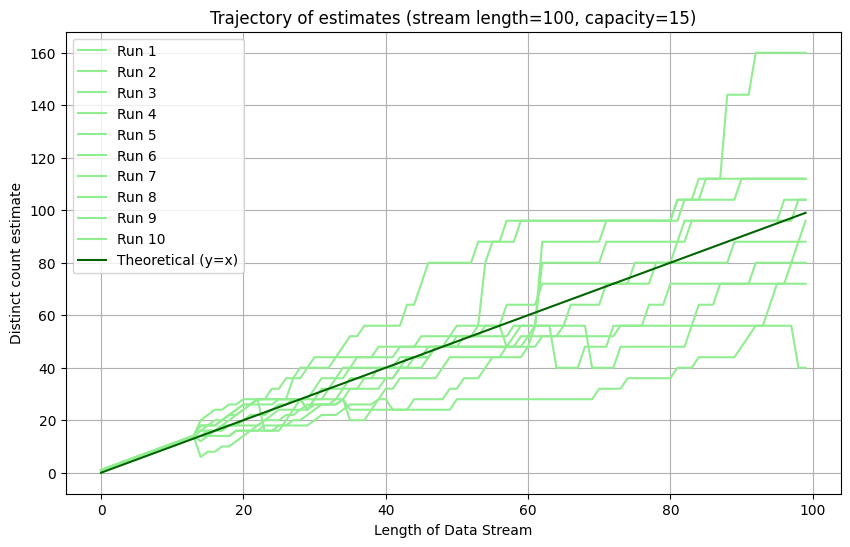

In [7]:
# Run the count_elements function 10 times with a stream of 100 unique elements
stream_len = 100
stream = list(range(stream_len))
max_capacity = 15
runs = 10
histories = []

for _ in range(runs):
    _, history = count_elements(stream, max_capacity)
    histories.append(history)

# Plot the history of these runs
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history, label=f'Run {i+1}', color='lightgreen')

# Plot the theoretical curve y=x
plt.plot(range(stream_len), range(stream_len), label='Theoretical (y=x)', linestyle='-', color='darkgreen')

# Add labels and legend
plt.xlabel('Length of Data Stream')
plt.ylabel('Distinct count estimate')
plt.title(f'Trajectory of estimates (stream length={stream_len}, capacity={max_capacity})')
plt.legend()
plt.grid(True)
plt.show()

### Plotting 10 trajectories for a stream of size 10 000 and 4000 unique elements and a capacity of 500

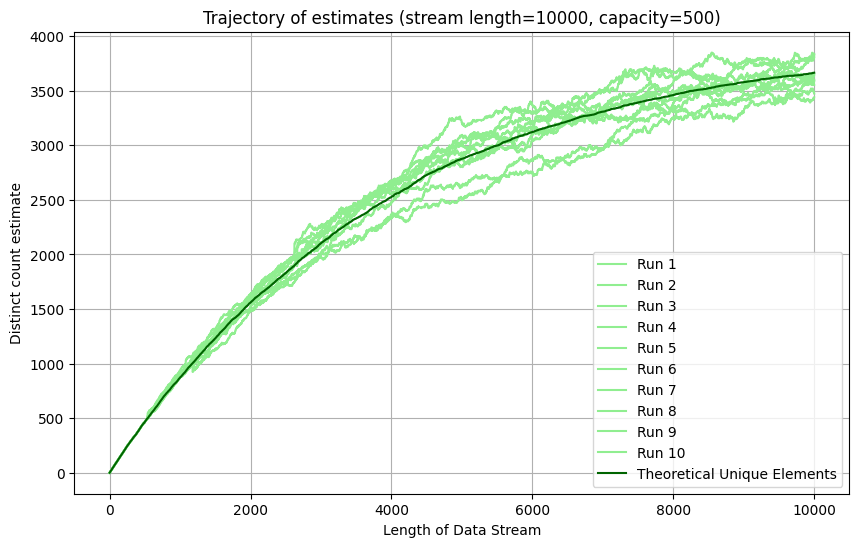

In [8]:
# Generate a stream of length 10,000 with each element being a random integer from 1 to 4,000
stream_len = 10000
stream = [random.randint(1, 4000) for _ in range(stream_len)]
# Calculate the theoretical number of unique elements at each moment of the stream
theoretical_unique_elements = []
seen_elements = set()
for element in stream:
    seen_elements.add(element)
    theoretical_unique_elements.append(len(seen_elements))

max_capacity = 500
runs = 10
histories = []

# Run the count_elements function 10 times with the generated stream
for _ in range(runs):
    _, history = count_elements(stream, max_capacity)
    histories.append(history)

# Plot the history of these runs
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history, label=f'Run {i+1}', color='lightgreen')

# Plot the theoretical curve
plt.plot(theoretical_unique_elements, label='Theoretical Unique Elements', linestyle='-', color='darkgreen')

# Add labels and legend
plt.xlabel('Length of Data Stream')
plt.ylabel('Distinct count estimate')
plt.title(f'Trajectory of estimates (stream length={stream_len}, capacity={max_capacity})')
plt.legend()
plt.grid(True)
plt.show()

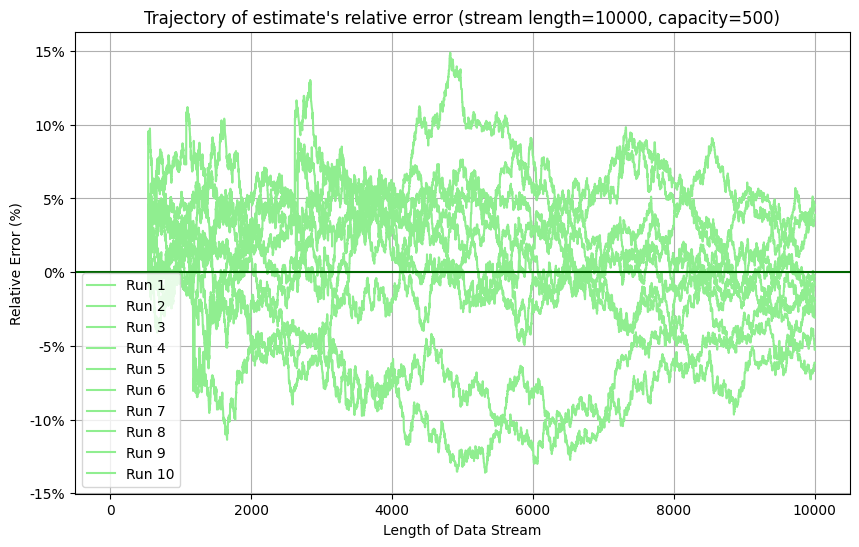

In [9]:
# Plot the relative error for each run
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    relative_error = [(history[j] - theoretical_unique_elements[j]) / theoretical_unique_elements[j] for j in range(len(history))]
    plt.plot(relative_error, label=f'Run {i+1}', color='lightgreen')

# Plot a darkgreen line at y=0
plt.axhline(y=0, color='darkgreen', linestyle='-')

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add labels and legend
plt.xlabel('Length of Data Stream')
plt.ylabel('Relative Error (%)')
plt.title(f'Trajectory of estimate\'s relative error (stream length={stream_len}, capacity={max_capacity})')
plt.legend()
plt.grid(True)
plt.show()